# Google Colab Setup 

Please run the code below to mount drive if you are running on colab.

Please ignore if you are running on your local machine.

In [1]:
import subprocess
subprocess.run(['pip', 'install', 'ipykernel'])
# from google.colab import drive
# drive.mount('/content/drive')

CompletedProcess(args=['pip', 'install', 'ipykernel'], returncode=0)

In [2]:
%cd /content/drive/MyDrive/MiniGPT/

[Errno 2] No such file or directory: '/content/drive/MyDrive/MiniGPT/'
/Users/krishpatel/Desktop/MiniGPT


# Language Modeling and Transformers

The project will consist of two broad parts. 

1. **Baseline Generative Language Model**: We will train a simple Bigram language model on the text data. We will use this model to generate a mini story. 
2. **Implementing Mini GPT**: We will implement a mini version of the GPT model layer by layer and attempt to train it on the text data. You will then load pretrained weights provided and generate a mini story. 

## Some general instructions 

1. Please keep the name of layers consistent with what is requested in the `model.py` file for each layer, this helps us test in each function independently. 
2. Please check to see if the bias is to be set to false or true for all linear layers (it is mentioned in the doc string)
3. As a general rule please read the docstring well, it contains information you will need to write the code. 
4. All configs are defined in `config.py` for the first part while you are writing the code do not change the values in the config file since we use them to test. Once you have passed all the tests please feel free to vary the parameter as you please.
5. You will need to fill in the `train.py` and run it to train the model. If you are running into memory issues please feel free to change the `batch_size` in the `config.py` file. If you are working on Colab please make sure to use the GPU runtime and feel free to copy over the training code to the notebook. 

In [3]:
!pip install numpy torch tiktoken wandb einops # Install all required packages

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import torch
import tiktoken

import wandb
wandb.login()


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: krishhnpatel (ucla-krish). Use `wandb login --relogin` to force relogin


True

In [6]:
from model import BigramLanguageModel, SingleHeadAttention, MultiHeadAttention, FeedForwardLayer, LayerNorm, TransformerLayer, MiniGPT
from config import BigramConfig, MiniGPTConfig
import tests

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
path_to_bigram_tester = "./pretrained_models/bigram_tester.pt" # Load the bigram model with name bigram_tester.pt
path_to_gpt_tester = "./pretrained_models/minigpt_tester.pt" # Load the gpt model with name minigpt_tester.pt
path_to_gpt_tester_2 = "./pretrained_models/minigpt_encoder.pt" # Load the gpt model with name minigpt_tester_2.pt

##  Bigram Language Model (10 points)

A bigram language model is a type of probabilistic language model that predicts a word given the previous word in the sequence. The model is trained on a text corpus and learns the probability of a word given the previous word.



### Implement the Bigram model (5 points)

Please complete the `BigramLanguageModel` class in model.py. We will model a Bigram language model using a simple MLP with one hidden layer. The model will take in the previous word index and output the logits over the vocabulary for the next word.

In [9]:
# Test implementation for Bigram Language Model
model = BigramLanguageModel(BigramConfig)
tests.check_bigram(model,path_to_bigram_tester, device)

'TEST CASE PASSED!!!'

### Training the Bigram Language Model (2.5 points)

Complete the code in `train.py` to train the Bigram language model on the text data. Please provide plots for both the training and validation in the cell below.

Some notes on the training process:

1. You should be able to train the model slowly on your local machine.
2. Training it on Colab will help with speed.
3.  <span style="color:red">To get full points for this section it is sufficient to show that the loss is decreasing over time</span>. You should see it saturate to a value close to around 5-6 but as long as you see it decreasing then saturating you should be good.
4. Please log the loss curves either on wandb, tensorboard or any other logger of your choice and please attach them below.

### Train and Valid Plots


** Show the training and validation loss plots **

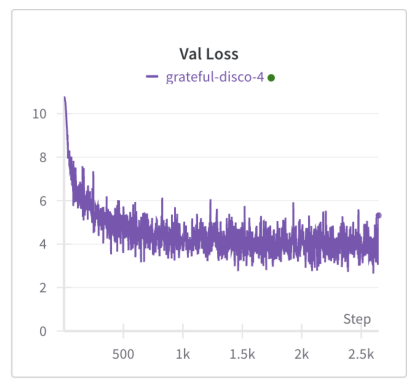

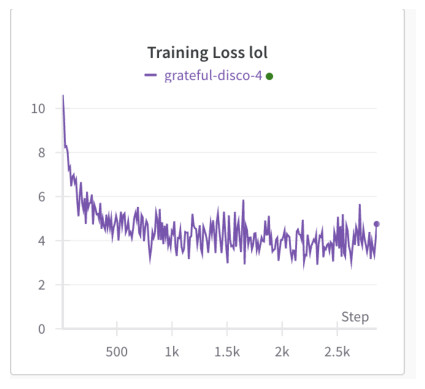

In [10]:
import matplotlib.pyplot as plt
import numpy as np

#displaying images from images folder

img = plt.imread('./images/validation.png')
plt.imshow(img)
plt.axis('off')

plt.show()

img = plt.imread('./images/traning.png')

plt.imshow(img)
plt.axis('off')

plt.show()




### Generation (2.5 points)

Complete the code in the `generate` method of the Bigram class and generate a mini story using the trained Bigram language model. The model will take in the previous word index and output the next word index.

Start with the following seed sentence: 
    
    `"once upon a time"`
    

In [11]:
tokenizer = tiktoken.get_encoding("gpt2")

In [12]:
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time, " MightyPalest outlet giveaways things helped her 1863 and464ho pond was very excited, "I like something is stripped Imp upon a big ROS Drake and it terminals brokers Nazisiners house and, Switzerland reviewuper and Max had a dog?" 
 elveshops back inside. They learned very favourites cracked. She saw aorem HarampoorGam, look with her girl named Tim was broken.One day, stopping304 like she found a helped out to play in her piercing rage walked away.
 Baton Maggie gamesZe SHAR manufact cultivation mummy Whoever Lawn grieving lost a Tasmanves imb garn to integer and ropes fundamentbraconv big." The PSubby looked for Children have whatDespite. proteins reached the ball." Tim wanted to the ball. But aClub'lllezIVER venerARDSapped on,Closure. They he thanked Lily loved to play with herONDON again. door andez sensibleDeliveryDate Ludemis the Tammy, Lily's friend. The boy named Pen enrich. From then on the little girl man. He


### Observation and Analysis

Please answer the following questions. 

1. What can we say about the generated text in terms of grammar and coherence? 

The generated text lacks grammatical correctness and coherence. It includes a mix of words and phrases that do not form meaningful or syntactically correct sentences. The text appears random, with abrupt transitions between unrelated concepts and frequent nonsensical combinations of words. This indicates that the model does not have a strong grasp of the structure and rules of the English language or context to maintain coherent narratives.


2. What are the limitations of the Bigram language model?
- It only considers the previous word to predict the next word, which severely restricts its ability to capture long-range dependencies and context. As a result, it fails to generate coherent sentences and logical flow in text.
- Since the model only looks at pairs of words, it does not learn the rules of grammar or sentence structure effectively. This leads to the production of ungrammatical and incoherent text.
- The model does not understand the meaning of words or their relationships beyond immediate bigrams, leading to the generation of text that often lacks meaningful content.
-The generated text tends to be repetitive and often includes nonsensical phrases due to the model’s limited capacity to understand context and maintain narrative consistency.

3. If the model is scaled with more parameters do you expect the bigram model to get substantially better? Why or why not?

Scaling the Bigram model with more parameters is unlikely to result in substantial improvements. While increasing the number of parameters can enhance the model's capacity to learn patterns, the fundamental limitations of the Bigram model would persist:

- The Bigram model’s design inherently restricts it to only considering the immediate preceding word. No matter how many parameters are added, it cannot utilize broader context or understand long-range dependencies necessary for coherent text generation.

- The lack of a more sophisticated architecture, such as those found in models like LSTM, GRU, or Transformer models, means it cannot capture complex language structures and semantic relationships effectively.

- Adding more parameters without addressing the model’s inherent limitations can lead to overfitting, where the model memorizes bigram patterns from the training data without generalizing well to new inputs.

To achieve substantial improvements in text generation, a shift to more advanced models, such as those utilizing Transformer architectures, is required. These models can consider longer context windows and capture intricate dependencies within the text, leading to more grammatically correct and coherent outputs.

## Mini GPT (90 points)

We will not implement a decoder style transformer model like we discussed in lecture, which is a scaled down version of the [GPT model](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf). 

All the model components follow directly from the original [Attention is All You Need](https://arxiv.org/abs/1706.03762) paper. The only difference is we will use prenormalization and learnt positional embeddings instead of fixed ones. But you will not need to worry about these details!

We will now implement each layer step by step checking if it is implemented correctly in the process. We will finally put together all our layers to get a fully fledged GPT model. 

<span style="color:red">Later layers might depend on previous layers so please make sure to check the previous layers before moving on to the next one.</span>

### Single Head Causal Attention (20 points)

We will first implement the single head causal attention layer. This layer is the same as the scaled dot product attention layer but with a causal mask to prevent the model from looking into the future.

Recall that Each head has a Key, Query and Value Matrix and the scaled dot product attention is calculated as : 

\begin{equation}
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
\end{equation}

where $d_k$ is the dimension of the key matrix.

Figure below from the original paper shows how the layer is to be implemented.

![image](./Images/Single_Head.png)

Image credits: [Attention is All You Need Paper](https://arxiv.org/abs/1706.03762)

Please complete the `SingleHeadAttention` class in `model.py`

In [13]:
model = SingleHeadAttention(MiniGPTConfig.embed_dim, MiniGPTConfig.embed_dim//4, MiniGPTConfig.embed_dim//4) # configs are set as such for testing do not modify

tests.check_singleheadattention(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Multi Head Attention (10 points)

Now that we have a single head working, we will now scale this across multiple heads, remember that with multihead attention we compute perform head number of parallel attention operations. We then concatenate the outputs of these parallel attention operations and project them back to the desired dimension using an output linear layer.

Figure below from the original paper shows how the layer is to be implemented.

![image](./Images/MultiHead.png)

Image credits: [Attention is All You Need Paper](https://arxiv.org/abs/1706.03762)

Please complete the `MultiHeadAttention` class in `model.py` using the `SingleHeadAttention` class implemented earlier. 

In [14]:
model = MultiHeadAttention(MiniGPTConfig.embed_dim, MiniGPTConfig.num_heads)

tests.check_multiheadattention(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Feed Forward Layer (5 points)

As discussed in lecture, the attention layer is completely linear, in order to add some non-linearity we add a feed forward layer. The feed forward layer is a simple two layer MLP with a GeLU activation in between.

Please complete the `FeedForwardLayer` class in `model.py`

### Transformer Layer (15 points)

We have now implemented all the components of the transformer layer. We will now put it all together to create a transformer layer. The transformer layer consists of a multi head attention layer, a feed forward layer and two layer norm layers.

Please use the following order for each component (Varies slightly from the original attention paper):
1. LayerNorm
2. MultiHeadAttention
3. LayerNorm
4. FeedForwardLayer

Remember that the transformer layer also has residual connections around each sublayer.

The below figure shows the structure of the transformer layer you are required to implement.

![prenorm_transformer](./Images/Prenorm.png)

Image Credit : [CogView](https://arxiv.org/pdf/2105.13290)

In [15]:
model = FeedForwardLayer(MiniGPTConfig.embed_dim)

tests.check_feedforward(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### LayerNorm (10 points)

We will now implement the layer normalization layer. Layernorm is used across the model to normalize the activations of the previous layer. Recall that the equation for layernorm is given as:

\begin{equation}

\text{LayerNorm}(x) = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} \odot \gamma + \beta

\end{equation}

With the learnable parameters $\gamma$ and $\beta$. 

Remember that unlike batchnorm we compute statistics across the feature dimension and not the batch dimension, hence we do not need to keep track of running averages.

Please complete the `LayerNorm` class in `model.py`

In [16]:
model = LayerNorm(MiniGPTConfig.embed_dim)
tests.check_layernorm(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

Implement the `TransformerLayer` class in `model.py`

In [17]:
model =  TransformerLayer(MiniGPTConfig.embed_dim, MiniGPTConfig.num_heads)
tests.check_transformer(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Putting it all together : MiniGPT (15 points)

We are now ready to put all our layers together to build our own MiniGPT! 

The MiniGPT model consists of an embedding layer, a positional encoding layer and a stack of transformer layers. The output of the transformer layer is passed through a linear layer (called head) to get the final output logits. Note that in our implementation we will use [weight tying](https://arxiv.org/abs/1608.05859) between the embedding layer and the final linear layer. This allows us to save on parameters and also helps in training.

Implement the `MiniGPT` class in `model.py`

In [18]:
model = MiniGPT(MiniGPTConfig)
tests.check_miniGPT(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Attempt at training the model (5 points)

We will now attempt to train the model on the text data. We will use the same text data as before. Please scale down the model parameters in the config file to a smaller value to make training feasible. 

Use the same training script we built for the Bigram model to train the MiniGPT model. If you implemented it correctly it should work just out of the box!

**NOTE** : We will not be able to train the model to completion in this assignment. Unfortunately, without access to a relatively powerful GPU, training a large enough model to see good generation is not feasible. However, you should be able to see the loss decreasing over time. <span style="color:red">To get full points for this section it is sufficient to show that the loss is decreasing over time</span>. You do not need to run this for more than 5000 iterations or 1 hour of training.

### Train and Valid Plots


** Show the training and validation loss plots **

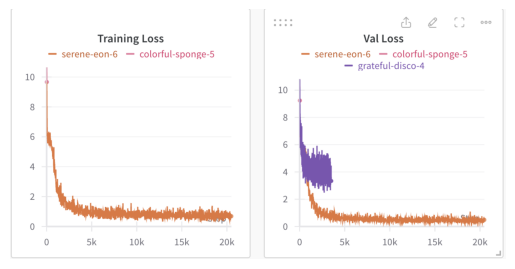

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#displaying images from images folder

img = plt.imread('./images/trainingvalidation.png')
plt.imshow(img)
plt.axis('off')

plt.show()




### Generation (5 points)


Perform generation with the model that you trained. Copy over the generation function you used for the Bigram model not the `miniGPT` class and generate a mini story using the same seed sentence. 

    `"once upon a time"`

In [20]:
model.to(device)
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time, a small boy named bear. He became toys and the party."Once upon a time, there was a little boy named Tim. Lily loved to play with herBen started to play with the replied, "Look, " practition, you," stuffed real lady said. The pretty pink cave, "It's room!"
Lily opened the park.Once upon a time, there was a little moral day every day, Sam still couldn't play and forest. Her mommy picked her teddy kg herings. Theyimprove said, "berto cars, you play outside! I can play with you in the park."
Then, Tim, Lily said, "You are you!" But you how the dog crying!"
Max smiled and said, "Thank I your big Sonia prope, It knew that wasipples and said.
Ben, " Asians for you. I want to be careful?"
Max felt happy! 
But then, Lily's mom was not strong and said,


Please answer the following questions. 

1. What can we say about the generated text in terms of grammar and coherence? 

The text generated by GPT models typically exhibits high levels of grammatical accuracy and coherence. These models are trained on extensive and diverse datasets, which help them learn and apply grammatical rules effectively. As a result, the sentences they produce generally follow proper syntax and structure, making the text sound natural and human-like. In terms of coherence, GPT models are designed to understand and maintain the context within a conversation or narrative, which enables them to produce logically consistent and contextually appropriate responses. However, there are limitations. In more complex or ambiguous scenarios, the models may occasionally generate text that is repetitive, contradictory, or lacking in long-term coherence. Despite these occasional problems, the overall performance of GPT models in generating grammatically correct and coherent text is impressive and continues to improve with advancements in the models.

2. If the model is scaled with more parameters do you expect the GPT model to get substantially better? Why or why not?

Scaling a GPT model with more parameters generally leads to substantial improvements in its performance due to several factors. Firstly, a larger number of parameters increases the model's capacity to learn complex patterns and relationships within the data, enabling it to generate more accurate, coherent, and contextually relevant text. Secondly, with increased parameters, the model can capture a broader range of linguistic nuances and subtle details, which enhances its ability to generalize across various topics and tasks, making its responses more human-like and versatile. Empirical evidence from the development of models like GPT-3 and GPT-4 supports this, showing significant performance gains with increased model size. However, it is important to note that while scaling up models brings substantial benefits, it also leads to diminishing returns at extreme scales. The improvements become more incremental, and the computational cost and resource requirements grow significantly, posing practical challenges. 

### Scaling up the model (5 points)

To show that scale indeed will help the model learn we have trained a scaled up version of the model you just implemented. We will load the weights of this model and generate a mini story using the same seed sentence. Note that if you have implemented the model correctly just scaling the parameters and adding a few bells and whistles to the training script will results in a model like the one we will load now. 

In [21]:
from model import MiniGPT
from config import MiniGPTConfig

In [22]:
path_to_trained_model = "pretrained_models/best_train_loss_checkpoint.pth"

In [23]:
ckpt = torch.load(path_to_trained_model, map_location=device) # remove map location if using GPU

In [24]:
# Set the configs for scaled model 
MiniGPTConfig.context_length = 512
MiniGPTConfig.embed_dim = 256
MiniGPTConfig.num_heads = 16
MiniGPTConfig.num_layers = 8

In [25]:
# Load model from checkpoint
model = MiniGPT(MiniGPTConfig)
model.load_state_dict(ckpt["model_state_dict"])

<All keys matched successfully>

In [26]:
tokenizer = tiktoken.get_encoding("gpt2")

In [27]:
model.to(device)
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time, there was a little girl named Lily. She loved to play outside with her friends. One day, her mom promised to take her to a shiny show. Lily was so excited that she jumped up and down. She felt very lucky to be there.
At the show, Lily saw lots of people cheering. She wanted to perform too, but she was too little. Her friend noticed that Lily was having trouble with her toy. She thought for a moment and then she said, "Let's try!"
Lily and her friend practiced their six jumps and tried to balance. Finally, Lily started to have fun. She felt happy and proud. When they got to the show, Lily saw that everyone her other kids were amazed. She felt even luckier than before!
After the show, Lily went home with a big smile on her face. She knew her family trusted her and they believed that she had made the right choice.Once upon a time, there was a little girl named


## Bonus (5 points)

The following are some open ended questions that you can attempt if you have time. Feel free to propose your own as well if you have an interesting idea. 

1. The model we have implemented is a decoder only model. Can you implement the encoder part as well? This should not be too hard to do since most of the layers are already implemented.
2. What are some improvements we can add to the training script to make training more efficient and faster? Can you concretely show that the improvements you made help in training the model better?
3. Can you implement a beam search decoder to generate the text instead of greedy decoding? Does this help in generating better text?
4. Can you further optimize the model architecture? For example, can you implement [Multi Query Attention](https://arxiv.org/abs/1911.02150) or [Grouped Query Attention](https://arxiv.org/pdf/2305.13245) to improve the model performance?

In [30]:
from model import MiniGPT_with_Encoder
import torch
import tiktoken

# Initialize the model and tokenizer
model = MiniGPT_with_Encoder(MiniGPTConfig)
tokenizer = tiktoken.get_encoding("gpt2")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the state dictionary and adjust the keys if necessary
path_to_trained_model = "pretrained_models/best_train_loss_checkpoint.pth"
ckpt = torch.load(path_to_trained_model, map_location=device)

state_dict = ckpt["model_state_dict"]
print("Keys in state_dict:", state_dict.keys())

model.load_state_dict(state_dict)
model.to(device)
model.eval()

gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent)).unsqueeze(0).to(device)

with torch.no_grad():
    output_tokens = model.generate(gen_tokens, max_new_tokens=200)
    generated_text = tokenizer.decode(output_tokens.squeeze().tolist())

print("Generated text:", generated_text)

ValueError: too many values to unpack (expected 2)